# 6.4. WHR_Supervised Machine Learning_Regression Analysis

## This script contains the following points:

#### 1. Importing Libraries
#### 2. Loading and Checking the Data
#### 3. Data cleaning
#### 4. Visual data exploration (scatterplot)
#### 5. Hypothesis
#### 6. Data prep for regression analysis
#### 7. Regression analysis

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
# Ensure charts are displayed without the need to "call" them specifically 

%matplotlib inline 

# 2. Loading and Checking the Data

In [3]:
# folder path to my main project folder is now stored within variable 'path'

path = r'/Users/pau/10-06-2024 World Happiness Report'

#### Importing the “WHR_2019_cleaned.csv” data set into my Jupyter notebook using the os library as df_whr

In [4]:
# using the os.path.join() function to simplify the importing data and create dataframe: whr

df_whr = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','WHR_2019_cleaned.csv'), index_col = False)

In [5]:
# Checking “WHR_2019_cleaned.csv” data is correctly loaded

print(df_whr.head()) # to ensure nothing looks off about our imported dataframes.
print(df_whr.info())
df_whr.shape # to confirm the total size of our imported df. Great way to get a feel for the data and have a better idea how to proceed.

   Unnamed: 0  rank country_or_region  happiness_score  GDP_per_capita  \
0           0     1           Finland            7.769           1.340   
1           1     2           Denmark            7.600           1.383   
2           2     3            Norway            7.554           1.488   
3           3     4           Iceland            7.494           1.380   
4           4     5       Netherlands            7.488           1.396   

   social_support_score  life_expectancy  freedom_score  generosity_score  \
0                 1.587            0.986          0.596             0.153   
1                 1.573            0.996          0.592             0.252   
2                 1.582            1.028          0.603             0.271   
3                 1.624            1.026          0.591             0.354   
4                 1.522            0.999          0.557             0.322   

   corruption_perception_score  
0                        0.393  
1                        0

(156, 10)

# 3. Data cleaning

### Checking for Extreme Values/Outliers

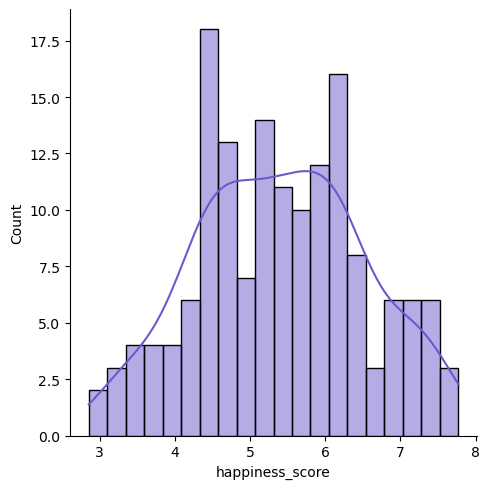

In [6]:
# Shows extreme values
# Following instruction of the warning: adapted my code to use `displot`, instead of`distplot`, as it will be removed.

sns.displot(df_whr['happiness_score'], bins=20, color='slateblue', kde=True) 


In [7]:
df_whr['happiness_score'].mean() # Check the mean

5.407096153846155

In [8]:
df_whr['happiness_score'].median() # Check the median

5.3795

In [9]:
df_whr['happiness_score'].max() # Check the max

7.769

In [10]:
df_whr['happiness_score'].min() # Check the min

2.853

#### Checking Extreme Values of the Variable "Happiness Score"

Following my initial descriptive statistics examination in Task 6.1, here are more detailed observations regarding the variable "Happiness Score":

- **Range**: 2.853 to 7.769
   - The full potential range of the scale (0 to 10) is not utilized, indicating that there are no regions of absolute perceived unhappiness or perfect happiness within the dataset. This observation suggests a moderation in the extremes of perceived happiness globally.

- **Mean**: 5.41
   - The average happiness score is 5.41 on a scale where 10 represents maximum happiness. This moderate average suggests that while global happiness is not overwhelmingly high, the general sentiment leans more towards positivity than negativity.

- **Median**: 5.38
   - The median score, being very close to the mean, suggests a roughly symmetric distribution of happiness scores around the mean. This proximity indicates a balanced distribution without significant skewness towards either high or low values.

### Interpretation

In my analysis of happiness scores, I observe that extreme values often represent valid data points rather than errors or anomalies. These extremes reflect genuine variations in subjective well-being across different regions or countries. 

The absence of scores reaching the theoretical maximum or minimum on the scale suggests that even in the least happy countries, there are still positive aspects influencing their scores, just as challenges exist in the happiest countries that prevent them from achieving perfect scores. These findings are crucial as they highlight the diverse range of happiness levels, influenced by a multitude of factors including economic conditions, social freedoms, and personal perceptions of life quality.


# 4. Visual data exploration (scatterplot)

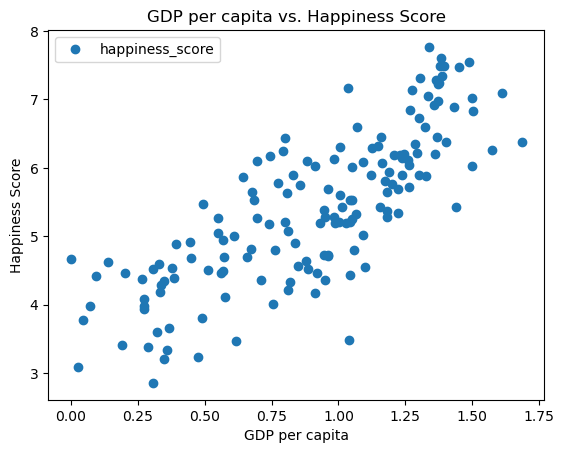

In [11]:
# Create a scatterplot using matplotlib plotting GDP per capita against happiness score

df_whr.plot(x = 'GDP_per_capita', y = 'happiness_score', style='o')
plt.title('GDP per capita vs. Happiness Score', fontsize = 12) # add a title)  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness Score')  
plt.show()

# 5. Hypothesis


- **Null Hypothesis (H0)**: There is no significant correlation between a country's GDP per capita and its happiness score.
      *"If a country's GDP per capita increases, then there will be no significant change in its happiness score."*

- **Alternative Hypothesis (H1)**: Higher GDP per capita is associated with higher happiness scores across countries.
     *"If a country's GDP per capita increases, then its happiness score will increase."*

# 6. Data prep for regression analysis

#### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df_whr['GDP_per_capita'].values.reshape(-1,1)
y = df_whr['happiness_score'].values.reshape(-1,1)

In [13]:
X

array([[1.34 ],
       [1.383],
       [1.488],
       [1.38 ],
       [1.396],
       [1.452],
       [1.387],
       [1.303],
       [1.365],
       [1.376],
       [1.372],
       [1.034],
       [1.276],
       [1.609],
       [1.333],
       [1.499],
       [1.373],
       [1.356],
       [1.433],
       [1.269],
       [1.503],
       [1.3  ],
       [1.07 ],
       [1.324],
       [1.368],
       [1.159],
       [0.8  ],
       [1.403],
       [1.684],
       [1.286],
       [1.149],
       [1.004],
       [1.124],
       [1.572],
       [0.794],
       [1.294],
       [1.362],
       [1.246],
       [1.231],
       [1.206],
       [0.745],
       [1.238],
       [0.985],
       [1.258],
       [0.694],
       [0.882],
       [1.092],
       [1.162],
       [1.263],
       [0.912],
       [1.5  ],
       [1.05 ],
       [1.187],
       [1.301],
       [1.237],
       [0.831],
       [1.12 ],
       [1.327],
       [0.642],
       [1.173],
       [0.776],
       [1.201],
       [

In [14]:
y

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

#### Split the data into two sets: a training set and a test set.

In [15]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 7. Regression analysis

#### Run a Linear Regression on the Data
1. **Fit the Model**: Fit the model you created to the **training set**.

2. **Make Predictions**: Use the fitted model to create predictions for `y` on the **test set**.


In [16]:
# Create a regression object

regression = LinearRegression() # This is the regression object, which will be fit onto the training set

In [17]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

#### Visualize the Regression Results
- **Create a Plot**: Generate a plot that displays the regression line along with actual data points on the **test set**. This visualization will help assess how well the regression line fits the actual data.

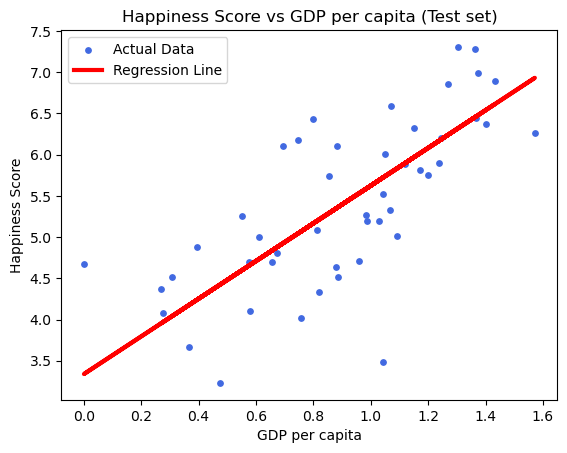

In [19]:
# Plot actual vs predicted values to visualize model performance

plot_test = plt
plot_test.scatter(X_test, y_test, color='royalblue', label= 'Actual Data', s = 15)
plot_test.plot(X_test, y_predicted, color='red', label= 'Regression Line', linewidth =3)
plot_test.title('Happiness Score vs GDP per capita (Test set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness Score')
plot_test.legend()

# Export to the "Visualizations" folder

file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'regression_line_test_set.png')
plot_test.savefig(file_name)

# Show the plot
plot_test.show()

#### Interpretation of the Happiness Score vs GDP per Capita Plot (Test Set)

The plot visually represents the relationship between GDP per capita and happiness scores using a linear regression model:

- **Model Fit**: The red regression line indicates a moderate fit to the test set data. This suggests that while the model captures the general trend, there are variances in happiness scores that it does not fully account for.
  
- **Relationship**: The positive slope of the regression line illustrates a positive correlation between GDP per capita and happiness scores. As GDP per capita increases, happiness scores tend to rise. This observation is consistent with existing research that links economic prosperity to higher levels of subjective well-being. Such a trend underscores the impact of economic factors on perceived happiness and supports theories that advocate for economic growth as a means to enhance societal happiness.


#### Evaluating the model's accuracy by checking its performance with summary statistics, MSE and R2 score.

In [20]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [21]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.28560657]]
Mean squared error:  0.5168179896793245
R2 score:  0.49218256470476307


### Model Performance and Interpretation

##### Slope
- **Value**: Approximately 2.29
- **Interpretation**: The slope of the fitted regression line is 2.29, which indicates that for every unit increase in GDP per capita, there is an estimated increase of 2.29 in the happiness score. This positive slope underscores a direct relationship between economic prosperity and perceived happiness.

##### Mean Squared Error (MSE)
- **Value**: 0.52
- **Interpretation**: The MSE, a measure of the average squared difference between the predicted and actual happiness scores, stands at 0.52. This value points to the average deviation of data points from the fitted regression line, highlighting some variability in the model's predictions.

##### R-squared (R²) Score
- **Value**: 0.49
- **Interpretation**: The R² score is 0.49, indicating that about 49% of the variance in happiness scores is predictable from GDP per capita. This suggests a moderate explanatory power of GDP per capita over happiness scores, though it also implies that over half of the variability is due to other factors not included in this model.

#### Overall Analysis
The model moderately fits the test set data, as indicated by the positive relationship between GDP per capita and happiness scores. However, the Mean Squared Error reveals a degree of variability, suggesting that the model does not capture all nuances of the relationship. The R² score reflects a moderate level of predictive power, indicating that while GDP per capita is a significant predictor of happiness, other variables likely influence happiness scores as well.

In [22]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.436,5.167462
1,5.893,6.166272
2,6.198,6.186843
3,4.639,5.348025
4,6.446,6.465687
5,7.307,6.317122
6,6.100,5.354882
7,4.707,5.533159
8,4.107,4.660058
9,6.174,5.041754


### Model Performance on Test Set

##### Model Evaluation
- **Mean Squared Error (MSE)**: 0.517
  - This indicates that, on average, the model's predictions deviate from the actual values by approximately 0.72 units. The square root of MSE should ideally reflect the average error.
- **R-squared (R²) Score**: 0.492
  - The model explains about 49.2% of the variance in happiness scores. This level of performance is moderate, suggesting that while the model captures the overall trend, there is substantial variability in happiness scores it doesn't account for.

##### Analysis
- The side-by-side comparison of actual vs. predicted values highlights that while the model generally captures the trends, significant deviations in some predictions suggest areas for improvement. Further refinement of the model, perhaps by incorporating additional variables or employing more complex modeling techniques, could enhance both its accuracy and reliability.

#### Reflections on Data Bias

##### Importance of Addressing Bias
When evaluating the model’s predictions, it is vital to consider potential data biases that may affect the accuracy and fairness of the results. Data bias can distort model outcomes, leading to unreliable or unethical applications of predictive insights.

##### Potential Sources of Bias
Data bias might occur if the training data does not accurately represent the broader population, potentially leading to overrepresented or underrepresented groups. Additionally, biases could also arise from variations in cultural contexts or socioeconomic conditions that are not adequately captured by the data. Measurement errors during data collection can introduce further biases, affecting the model's predictions.

##### Strategies for Mitigation
Assessing the integrity and comprehensiveness of data sources and collection methods is crucial for addressing potential biases. Ensuring the dataset encompasses a broad spectrum of demographic groups can help in minimizing biases. Moreover, regularly testing the model’s performance across various demographic groups will aid in identifying and addressing biases effectively.

Reflecting on these aspects is essential not just for improving the model's performance but also for ensuring that its applications are both ethical and effective. Ensuring that the predictive model is robust and equitable will enhance its utility in real-world scenarios.
